# 1. Pandas
### - Seaborn은 matplotlib 기반의 시각화 라이브러리로 titanic 데이터를 내포하고 있음.

In [2]:
# 아래의 데이터를 사용
import seaborn as sns
import pandas as pd
import numpy as np
# seaborn 에서 데이터 로드를 위한 코드
titanic = sns.load_dataset('titanic')

## 데이터에 대한 정보 확인하기

In [3]:
# 테이블 형태의 데이터를 데이터프레임으로 읽었을 때,
# 어떤 형태의 데이터로 이루어져 있는지 확인하고 싶을 때,
# df.head() 또는 df.tail()을 사용한다.

titanic.head() # 처음부터 5번째까지 보여준다.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.tail() # 마지막부터 5번째 까지 보여준다.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


- survived 생존 여부 : 0 = 사망, 1 = 생존
- pclass : 티켓의 선실 등급 : 1 = 일등석, 2 = 이등석, 3 = 삼등석
- sex : 탑승자 성별
- age : 탑승자 나이
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
- parch : 같이 탑승한 부모님 또는 어린이 인원수
- fare : 요금
- embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton
- class : 선실 등급
- who : 탑승자 성별
- deck: 데크
- embark_town: 탑승 항구
- alive: 생존여부
- alone: 혼자인지 여부

In [6]:
# 데이터프레임의 행의 개수, 열의 개수, 각 컬럼별 타입등
# 데이터프레임에 대한 기본적인 정보를 확인하고 싶을 때
# df.info()를 사용한다

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [7]:
# 데이터프레임에 대한 컬럼별 기본적인 통계값을 확인하고 싶을 때
# 실수값에 대한 통계값을 확인할 수 있으며, 다른 타입에 대한 통계값은 확인할 수 없다.
# df.describe()를 사용한다.

titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 파이썬 내장함수인 len()를 사용해서 간단하게 데이터프레임의 행의 개수(데이터의 개수)확인


In [8]:
len(titanic)

891

- 특정 컬럼에 대한 유니크한 값에 대한 개수를 세고 싶을 때
- df.value_counts()도 사용가능 (이 경우 전체 컬럼에 대해서 적용)

In [9]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

- 특정 컬럼에 대한 유니크한 값이 몇개 있는지 알고 싶을 때
- df.nunique()도 사용가능 (이 경우 전체 컬럼에 대해서 적용)

In [10]:
titanic.pclass.nunique()

3

In [11]:
len(titanic.pclass.unique())

3

Pandas에서도 기본적인 집계함수를 제공하고 있다.

- sum, count
- min, max
- mean, var, std
- median, quantile

axis 을 조절해서 행별로 또는 컬럼별로 집계함수를 적용해서 데이터를 확인할 수 있다.

In [12]:
# df.sum()을 통해서
# titanic의 age 컬럼의 전체 합을 구할 수 있다.
titanic.age.sum()

21205.17

In [13]:
# df.count()를 통해서
# titanic 전체 컬럼별 데이터 개수를 셀 수 있다.
# Nan(결측치)는 제외하고 센다
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

- max()를 이용해서 Column의 최고값을 확인

In [14]:
# titanic의 age 컬럼에서 최고령자를 확인
titanic.age.max()

80.0

- min()을 이용해서 Column의 최소값을 확인

In [15]:
# titanic의 age 컬럼에서 최연소자를 확인
titanic.age.min()

0.42

- mean()을 이용해서 평균 값 확인

In [16]:
# titanic의 age 컬럼에서 평균 나이를 확인
titanic.age.mean()

29.69911764705882

- var()를 이용해서 분산 확인

In [18]:
# titanic의 age 컬럼에서 데이터가 기댓값으로부터 얼마나 떨어져 있는지 알 수 있다. # var : variance
titanic.age.var()

211.0191247463081

- std()를 이용해서 표준편차 확인

In [19]:
# titanic의 age 컬럼에서 데이터의 산포도를 확인할 수 있다. # std : standard deviation
titanic.age.std()

14.526497332334044

- median()을 이용해서 중간 값을 확인

In [20]:
# titanic의 age 컬럼에서 중간 나이를 구할 수 있다.
titanic.age.median()

28.0

- quantile()를 이용해서 백분위수 확인

In [21]:
# titanic의 age 컬럼에서 분위수를 구할 수 있다.
titanic.age.quantile(0.5) # 2사분위수, 중간값을 구할 수 있다.

28.0

## 데이터 정렬하기

- Pandas에서는 데이터를 정렬할 때, 값 또는 인덱스를 이용
- df.sort_index(), df.sort_values(by="column name")

In [22]:
# 값을 가지고 정렬할 때는 df.sort_values()를 이용한다.
# `by` 파라미터를 통해서 어떤 컬럼을 가지고 정렬할지 정할 수 있다.
# NaN 은 값이 없는 것

titanic.sort_values(by=['age'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [23]:
# 한개의 기준만을 가지고 정렬하는 것이 아니라 여러개의 기주을 가지고 정렬할 수도 있다.

titanic.sort_values(by=['age', 'fare'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,1,female,NaN,0,0,110.8833,C,First,woman,False,NaN,Cherbourg,yes,True
334,1,1,female,NaN,1,0,133.6500,S,First,woman,False,NaN,Southampton,yes,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
527,0,1,male,NaN,0,0,221.7792,S,First,man,True,C,Southampton,no,True


In [24]:
# 역순으로 정렬하는 것도 가능하다.
titanic.sort_values(by='age', ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [25]:
# 인덱스를 가지고 정렬할 때는 df.sort_index()를 사용한다.
titanic.sort_index()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [26]:
# 컬럼의 이름 정렬하는 것도 가능
titanic.sort_index(axis=1)

,adult_male,age,alive,alone,class,deck,embark_town,embarked,fare,parch,pclass,sex,sibsp,survived,who
0,True,22.0,no,False,Third,NaN,Southampton,S,7.2500,0,3,male,1,0,man
1,False,38.0,yes,False,First,C,Cherbourg,C,71.2833,0,1,female,1,1,woman
2,False,26.0,yes,True,Third,NaN,Southampton,S,7.9250,0,3,female,0,1,woman
3,False,35.0,yes,False,First,C,Southampton,S,53.1000,0,1,female,1,1,woman
4,True,35.0,no,True,Third,NaN,Southampton,S,8.0500,0,3,male,0,0,man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,27.0,no,True,Second,NaN,Southampton,S,13.0000,0,2,male,0,0,man
887,False,19.0,yes,True,First,B,Southampton,S,30.0000,0,1,female,0,1,woman
888,False,NaN,no,False,Third,NaN,Southampton,S,23.4500,2,3,female,1,0,woman
889,True,26.0,yes,True,First,C,Cherbourg,C,30.0000,0,1,male,0,1,man


## 데이터 합치기
Pandas에는 두 개 이상의 데이터프레임을 합치는데 사용할 수 있는 pd.merge() 메서드, pd.concat() 메서드를 제공한다.

서로 연관되어 있는 데이터 합칠 때 사용할 수 있고, 또는 데이터를 가공하고 나서 데이터를 한 꺼번에 합칠 때 사용할 수도 있다.


#### pd.concat()

In [28]:
# titanic 데이터가 컬럼기준으로 2개의 데이터프레임으로 나눠져 있다고 생각해보자.
df1 = titanic.iloc[:, :len(titanic.columns)//2]
df2 = titanic.iloc[:, len(titanic.columns)//2:]

In [29]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [30]:
df2.head()

,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,S,Third,man,True,NaN,Southampton,no,False
1,C,First,woman,False,C,Cherbourg,yes,False
2,S,Third,woman,False,NaN,Southampton,yes,True
3,S,First,woman,False,C,Southampton,yes,False
4,S,Third,man,True,NaN,Southampton,no,True


In [31]:
# 이러한 경우에 2개의 데이터를 합칠 때, pd.concat[..., axis=1)을 사용하면 된다.
pd.concat([df1, df2], axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [32]:
# 이번에는 titanic 데이터가 행기준으로 2개의 데이터프레임으로 나눠져 있다고 생각해보자.
df1 = titanic.iloc[:len(titanic)//2]
df2 = titanic.iloc[len(titanic)//2:]

In [33]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
445,1,1,male,4.0,0,2,81.8583,S,First,child,False,A,Southampton,yes,False
446,1,2,female,13.0,0,1,19.5000,S,Second,child,False,NaN,Southampton,yes,False
447,1,1,male,34.0,0,0,26.5500,S,First,man,True,NaN,Southampton,yes,True
448,1,3,female,5.0,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
449,1,1,male,52.0,0,0,30.5000,S,First,man,True,C,Southampton,yes,True


In [35]:
# 이러한 경우에 2개의 데이터를 합칠 때, pd.concat(..., axis=0)을 사용하면 된다.
pd.concat([df1, df2], axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### pd.merge()

- pd.merge()는 데이터베이스에서 사용하는 스타일의 데이터 병합 메서드이다.
- 즉, 키를 기준으로 두 개의 데이터프레임을 합친다.
- inner join, outer join 등을 지원한다.

In [36]:
# 아래의 데이터를 사용
df1 = pd.DataFrame([['A', 1],
                    ['B', 2],
                    ['C', 3]], columns=['x1',' x2'])
df2 = pd.DataFrame([['A', 'T'],
                    ['B', 'F'],
                    ['D', 'T']], columns=['x1', 'x3'])

In [37]:
df1.head()

,x1,x2
0,A,1
1,B,2
2,C,3


In [38]:
df2.head()

,x1,x3
0,A,T
1,B,F
2,D,T


In [39]:
# pd.merge() 메서더의 `how` 파라미터를 통해서 어떠한 방식으로 join 할지
# 그리고 `on` 파라미터를 통해서 어떤 것을 키로 사용할지 정할 수 있다.

# `how='inner'`, `on='x1'` 파라미터로 설정하면,
# x1를 기준으로 inner join을 한다.
# inner join은 키값이 일치하는 경우에만 병합한다.
pd.merge(df1, df2, how='inner', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [40]:
# `how='outer'`, `on='x1'` 파라미터로 설정하면,
# x1 기준으로 outter join을 한다.
# ouuter join은 키값이 존재하는 모든 것을 합치고, 없는 데이터의 경우 결측치로 처리한다.
pd.merge(df1, df2, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [41]:
# `how='left'`, `on='x1'` 파라미터로 설정하면,
# x1 기준으로 left outter join을 한다.
# left outer join은 왼쪽 데이터의 기준으로 합치고, 없는 데이터의 경우 결측치로 처리한다.
pd.merge(df1, df2, how='left', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [42]:
# `how='right'`, `on='x1'` 파라미터로 설정하면,
# x1 기준으로 right outter join을 한다.
# right outer join은 오른쪽 데이터의 기준으로 합치고, 없는 데이터의 경우 결측치로 처리한다.
pd.merge(df1, df2, how='right', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


## 피봇테이블과 그룹핑

### 피봇테이블

피봇테이블은 데이터프레임의 3개의 열을 선택하고, 첫 번째 열은 행 인덱스로, 두 번째 열은 열 인덱스로, 세번째 열은 데이터로 사용하여, 데이터를 한눈에 알아보기 쉽게 만들어준다. (키에 의해 결정되는 데이터가 1개일 때만 사용한다.)

만약, 행 인덱스와 열 인덱스에 일치하는 값이 없다면 결측치(NaN)값을 넣는다.

df.pivot[행 인덱스, 열 인덱스, 데이터에 사용할 인덱스]

In [44]:
# 아래의 데이터를 사용 
# 예제 데이터 링크(https://datascienceschool.net/01%20python/04.07%20%ED%94%BC%EB%B4%87%ED%85%8C%EC%9D%B4%EB%B8%94%EA%B3%BC%20%EA%B7%B8%EB%A3%B9%EB%B6%84%EC%84%9D.html#pivot-table)
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [45]:
df1.pivot("도시", "연도", "인구")

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


- CheatSheet의 Pivot 예제 추가

In [54]:
data2 = {
    "Date": ["2016-03-01", "2016-03-02", "2016-03-01", "2016-03-03", "2016-03-02", "2016-03-03"],
    "Type": ['a', 'b', 'c', 'a', 'a', 'c'],
    "Value": [11.432, 13.031, 20.784, 99.906, 1.303, 20.784]
}

In [55]:
columns = ('Date','Type','Value')
df2 = pd.DataFrame(data2, columns=columns)

In [56]:
df3 = df2.pivot('Date','Type','Value')

In [57]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [58]:
df3

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


### 그룹핑

그룹핑은 피봇테이블과 달리 키에 의해 결정되는 데이터가 여러 개 있을 때 사용한다. 그룹핑을 한 후, 그룹메서드를 이용하면 그룹 데이터의 대표값을 계산할 수 있다.

필요에 따라 사용자 정의 함수를 만들어서 대값을 계산할 수도 있다.

- groupby() 메서드를 통해서 데이터를 그룹핑 할 수 있다.

groupby() 메서드의 인자로 행 인덱스를 사용할 수도 있고, 열 인덱스를 사용할 수도 있다.

자주 사용되는 그룹 연산 메서드는 다음과 같다.
- size, count
- mean, median, min, max
- sum, prod, std, var, quantile
- first, last

이것 뿐만 아니라, 사용자 정의 함수를 적용할 수 있는 메서드들도 제공한다.
- agg, aggregate
- apply

In [60]:
# 타이타닉 데이터를 사용
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
# df.describe()를 통해서 기본적인 통계값을 확인했을 때 처럼
# 그룹핑을 한후에 describe() 메서드를 적용해서
# 키값 기준으로 기본적인 통계값을 볼 수도 있다.

titanic.groupby(by='sex').describe().T

sex                 female        male
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200

In [62]:
# 성별을 기준으로 age의 평균값을 구하고 싶다면,
# 그룹핑을 하면 쉽게 구할 수 있다.
titanic.groupby(by='sex').age.mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [63]:
# 2개를 기준으로 그룹핑도 할 수 있다.
# 성별과 객실 등급을 기준으로 age의 평균값을 구할 수도 있다.
titanic.groupby(by=['sex', 'pclass']).age.mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [65]:
# 성별과 객실 등급을 기준으로 age의 최댓값과 age의 최솟값을 뺀 연산도 할 수 있다.
# 이 경우 사용자가 함수를 직접 정의해서 agg() 메서드 또는 apply() 메서드에 인자로 집어넣으면 된다.

def max_min_diff(item):
    return item.max() - item.min()
titanic.groupby(by=['sex', 'pclass']).age.agg(max_min_diff)

sex     pclass
female  1         61.00
        2         55.00
        3         62.25
male    1         79.08
        2         69.33
        3         73.58
Name: age, dtype: float64

In [66]:
titanic.groupby(by=['sex', 'pclass']).age.apply(max_min_diff)

sex     pclass
female  1         61.00
        2         55.00
        3         62.25
male    1         79.08
        2         69.33
        3         73.58
Name: age, dtype: float64

## Pandas를 이용한 시각화

Pandas 에는 데이터를 시각화할 수 있는 plot() 메서드를 내장하고 있다.

matplotlib 라이브러리의 plot() 메서드를 내부에서 임포트하여 사용한다.

plot() 메서드는 kind 라는 인수를 바꿔서 여러가지 플롯을 그릴 수 있다.
- line
- bar, barh : 세로, 가로 막대
- hist, kde : histogram (도수 분포의 상태를 막대 모양으로 표현한 그래프), 커넬 정밀도 추정 (KDE, Kernel Density Estimate)그래프
- box : Box-and-Whisker, 데이터의 집합의 범위와 중앙값을 확인
- pie : 파이 모양의 원형 그래프
- scatter : 산포 그래프
- area, hexbin

<AxesSubplot:xlabel='sex'>

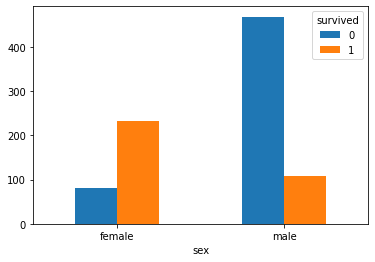

In [67]:
# 타이타닉 데이터를 사용해서 성별에 따른 생존 수 확인
titanic.groupby(by=['sex', 'survived']).size().unstack().plot(kind='bar', rot=0)

<AxesSubplot:ylabel='sex'>

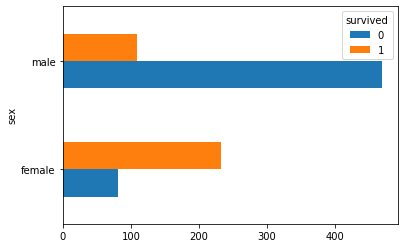

In [68]:
# 타이타닉 데이터를 사용해서 성별에 따른 생존수 확인
titanic.groupby(by=['sex', 'survived']).size().unstack().plot(kind='barh', rot=0)

<AxesSubplot:ylabel='Frequency'>

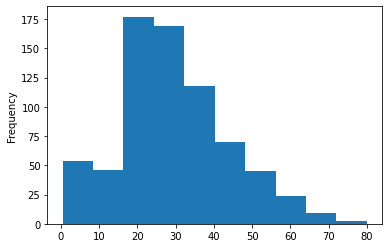

In [69]:
# 타이타닉 데이터를 사용해서 age 변수 빈도수 확인
titanic.age.plot(kind='hist')

<AxesSubplot:ylabel='Density'>

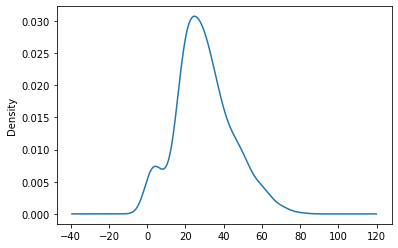

In [70]:
# 타이타닉 데이터를 사용해서 age 변수 빈도수 확인
# 히스토그램보다 부드러운 형태의 분포 곡선을 보여준다.
titanic['age'].plot(kind='kde')

최소값, 1사분위수(25%위치), 2사분위수(50%위치), 3사분위수(75%위치), 최대값, 아웃라이어에 대해서 더 쉽게 확인

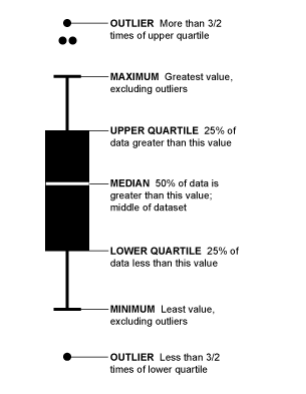

<AxesSubplot:>

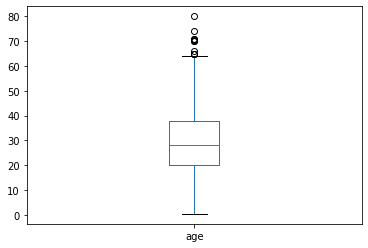

In [71]:
# 타이타닉 데이터를 사용해서 age 변수 빈도수 확인
titanic['age'].plot(kind='box')

<AxesSubplot:ylabel='None'>

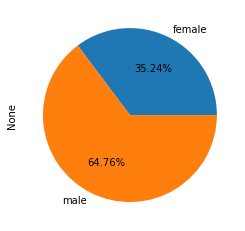

In [72]:
# 타이타닉 데이터를 사용해서 성별 비율 확인
titanic.groupby(by='sex').size().plot(kind='pie', autopct='%1.2f%%')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

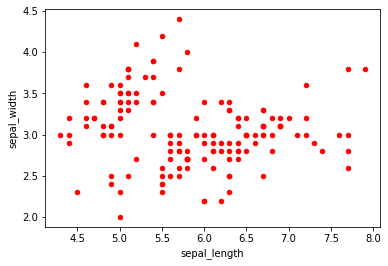

In [73]:
# 붓꽃 데이터를 사용해서 꽃받침의 길이와 꽃받침의 크기에 따른 산포도 확인
# scatter(x, y, s=None, c = None), s = 마커의 크기, c = 마커의 색상
iris = sns.load_dataset("iris")
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='red')